## Import Dependencies

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Importing data

In [57]:
wine_df = pd.read_csv('winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
wine_df.shape

(1599, 12)

## Checking for missing values

In [59]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [60]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

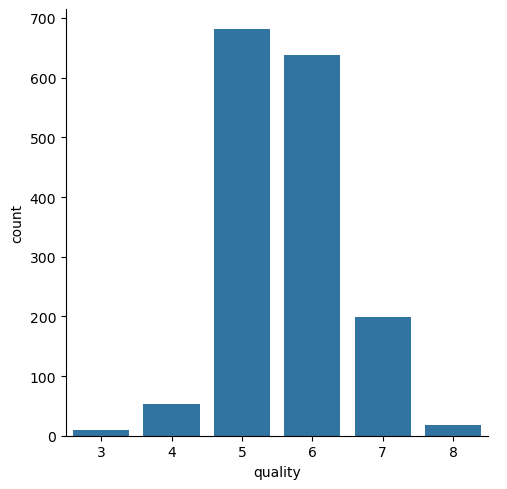

In [61]:
# number of values for each quality
sns.catplot(x='quality', data=wine_df, kind='count')
wine_df['quality'].value_counts()

[]

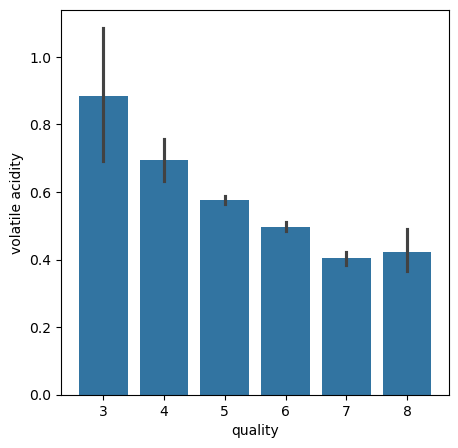

In [62]:
# volatile acidity vs quality
fig = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity", data=wine_df)
plt.plot()

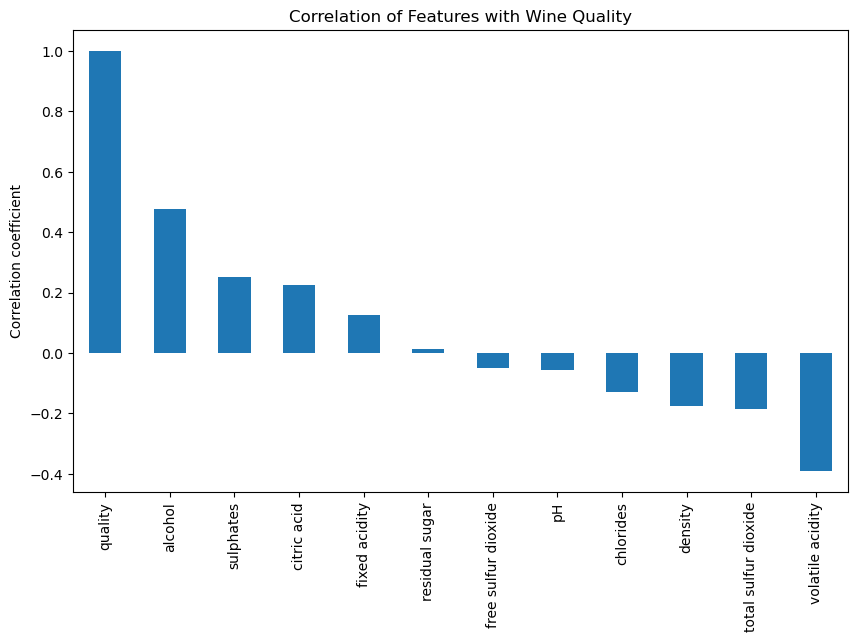

In [63]:
# Corrrelation of features with wine
corr = wine_df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
corr['quality'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation of Features with Wine Quality")
plt.ylabel("Correlation coefficient")
plt.show()

In [64]:
#corr['quality'].sort_values(ascending=False)

## Data Preprocessing

In [65]:
# Seperating the dadta and label
X = wine_df.drop(columns='quality', axis=1)

In [66]:
# Label binarization
wine_df['quality'] = wine_df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
Y = wine_df['quality']
print(Y.value_counts())

quality
0    1382
1     217
Name: count, dtype: int64


In [67]:
# Train and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599, 11) (1279, 11) (320, 11)
(1599,) (1279,) (320,)


## Model Training

model = RandomForestClassifier()
model.fit(X_train, Y_train)

## Model evaluation

In [69]:
# Accuracy in training data
X_training_pred = model.predict(X_train)
test = accuracy_score(X_training_pred, Y_train)
print("Accuracy on training data: ", test)

Accuracy on training data:  1.0


In [70]:
# Accuracy in test data
X_test_pred = model.predict(X_test)
test = accuracy_score(X_test_pred, Y_test)
print("Accuracy on test data:", test)

Accuracy on test data: 0.9


## Building a predictive System

In [71]:
ind = 16
#quality_col = wine_df['quality']
input_data = wine_df.iloc[ind].drop(['quality'])
print("Actual level:", wine_df.iloc[ind]['quality'])
#print(wine_df.iloc[70])

# changing the input data as a numpy array
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print("Prdicted level:", prediction)

if prediction[0] == 1:
    print("Wine is of good quality")
else:
    print("Wine is of bad quality")



Actual level: 1.0
Prdicted level: [1]
Wine is of good quality


D:\Program Files\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
